In [1]:
## This notebook is used to calculate the shift in the jet stream 
## Using wind speed data from MERRA-2 from 1980-2020

##Created by Kendra Herweck

In [1]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob
from scipy.interpolate import griddata

# North Atlantic #

In [9]:
### median value

year_list=[]
lat_list=[]
speed_list=[]
for i in range(1980,2020):  #2020
    year_list.append(i)
    file = 'WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][32:288] ##576
    wind=f.variables['U'][0,0,:,32:288]     ## 700 hpa 
    #print(f.variables['lon'][207])
    #print(f.variables['lat'][66])
    #print(f.variables['U'][0,66,204])
    #print(lat[:])
    #print(lon[:])
    
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.amax(wind_nonan)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
    mid = np.median(result[0])
    if mid%2 != 0:
        mid = np.floor(mid)
    #print(mid)
    boolarr2 =(result[0]==mid)
    result2=np.where(boolarr2)
    mid_index = np.median(result2)
    if mid_index%2 != 0:
        mid_index = np.floor(mid_index)
    mid_index=int(mid_index)
    
    
    
    lat_coord = f.variables['lat'][result[0][mid_index]]
    #lat_coord=lat_coord.compressed()
    #lat_coord = lat_coord[0]
    lat_list.append(lat_coord)
    latlist=[]
    lonlist=[]
    latlist.append(result[0][mid_index])
    lonlist.append(result[1][mid_index])
    #for elem in result[0]:
    #    latlist.append(elem)
    #for elem in result[1]:
    #    lonlist.append(elem+32)
print(year_list)
print(lat_list)
print(speed_list)

data_tbl = Table([year_list,lat_list,speed_list],names=('Year','Latitude','Wind Speed'))
print(data_tbl)
data_tbl.write('new-yearly_jetstream_latspeed-NAtlantic_median.csv',overwrite=True)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
[masked_array(data=34.,
             mask=False,
       fill_value=1e+20), masked_array(data=34.,
             mask=False,
       fill_value=1e+20), masked_array(data=42.,
             mask=False,
       fill_value=1e+20), masked_array(data=35.5,
             mask=False,
       fill_value=1e+20), masked_array(data=35.5,
             mask=False,
       fill_value=1e+20), masked_array(data=43.5,
             mask=False,
       fill_value=1e+20), masked_array(data=43.,
             mask=False,
       fill_value=1e+20), masked_array(data=42.,
             mask=False,
       fill_value=1e+20), masked_array(data=42.5,
             mask=False,
       fill_value=1e+20), masked_array(data=42.5,
             mask=False,
       fill_value=1e+20), masked_array(

In [12]:
### first value

year_list=[]
lat_list=[]
speed_list=[]
for i in range(1980,2020):  #2020
    year_list.append(i)
    file = 'WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][32:288] ##576
    wind=f.variables['U'][0,0,:,32:288]     ## 700 hpa 
    #print(f.variables['lon'][207])
    #print(f.variables['lat'][66])
    #print(f.variables['U'][0,66,204])
    #print(lat[:])
    #print(lon[:])
    
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.max(wind_nonan)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
#    mid = np.median(result[0])
#    if mid%2 != 0:
#        mid = np.floor(mid)
#    #print(mid)
#    boolarr2 =(result[0]==mid)
#    result2=np.where(boolarr2)
#    mid_index = np.median(result2)
#    if mid_index%2 != 0:
#        mid_index = np.floor(mid_index)
#    mid_index=int(mid_index)
    
    
    
    lat_coord = f.variables['lat'][result[0]]
    lat_coord=lat_coord.compressed()
    lat_coord = lat_coord[0]
    lat_list.append(lat_coord)
    latlist=[]
    lonlist=[]
    #latlist.append(result[0][mid_index])
    #lonlist.append(result[1][mid_index])
    for elem in result[0]:
        latlist.append(elem)
    for elem in result[1]:
        lonlist.append(elem+32)
print(year_list)
print(lat_list)
print(speed_list)

data_tbl = Table([year_list,lat_list,speed_list],names=('Year','Latitude','Wind Speed'))
print(data_tbl)
data_tbl.write('new-yearly_jetstream_latspeed-NAtlantic.csv',overwrite=True)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
[34.0, 34.0, 41.5, 35.5, 35.5, 43.5, 43.0, 41.5, 42.5, 42.5, 42.0, 43.5, 41.0, 44.0, 44.0, 44.0, 37.0, 39.0, 36.5, 40.0, 41.0, 38.0, 41.5, 42.0, 40.0, 57.0, 41.0, 43.0, 42.0, 41.5, 36.5, 35.5, 45.0, 43.5, 43.5, 50.0, 38.0, 39.0, 43.0, 41.5]
[18.5, 17.5625, 17.9375, 19.8125, 17.375, 18.0, 18.6875, 17.75, 17.875, 19.8125, 21.5, 19.1875, 16.6875, 16.875, 20.25, 18.4375, 16.3125, 16.375, 18.6875, 18.375, 17.5, 18.0625, 17.0625, 19.875, 17.0625, 16.0, 16.6875, 18.5, 18.6875, 17.75, 18.0625, 16.375, 16.9375, 17.125, 21.625, 18.6875, 18.1875, 16.375, 18.3125, 19.25]
Year Latitude Wind Speed
---- -------- ----------
1980     34.0       18.5
1981     34.0    17.5625
1982     41.5    17.9375
1983     35.5    19.8125
1984     35.5     17.375
1985     43.5     

# North Pacific #

In [47]:
year_list=[]
lat_list=[]
speed_list=[]
for i in range(1980,2021):  #2020
    year_list.append(i)
    file = 'Data/Wind-Data/YearlyWindData/WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][96:528] ##576
    wind=f.variables['U'][0,0,:,96:528]     ## 700 hpa 
    #print(f.variables['lon'][207])
    #print(f.variables['lat'][66])
    #print(f.variables['U'][0,66,204])
    #print(lat[:])
    #print(lon[:])
    
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.amax(wind_nonan)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
    mid = np.median(result[0])
    if mid%2 != 0:
        mid = np.floor(mid)
    #print(mid)
    boolarr2 =(result[0]==mid)
    result2=np.where(boolarr2)
    mid_index = np.median(result2)
    if mid_index%2 != 0:
        mid_index = np.floor(mid_index)
    mid_index=int(mid_index)
    
    
    
    lat_coord = f.variables['lat'][result[0][mid_index]]
    #lat_coord=lat_coord.compressed()
    #lat_coord = lat_coord[0]
    lat_list.append(lat_coord)
    latlist=[]
    lonlist=[]
    latlist.append(result[0][mid_index])
    lonlist.append(result[1][mid_index])
    #for elem in result[0]:
    #    latlist.append(elem)
    #for elem in result[1]:
    #    lonlist.append(elem+32)
print(year_list)
print(lat_list)
print(speed_list)

data_tbl = Table([year_list,lat_list,speed_list],names=('Year','Latitude','Wind Speed'))
print(data_tbl)
data_tbl.write('yearly_jetstream_latspeed-NPacific_median.csv',overwrite=True)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[masked_array(data=31.5,
             mask=False,
       fill_value=1e+20), masked_array(data=31.5,
             mask=False,
       fill_value=1e+20), masked_array(data=39.,
             mask=False,
       fill_value=1e+20), masked_array(data=34.,
             mask=False,
       fill_value=1e+20), masked_array(data=30.,
             mask=False,
       fill_value=1e+20), masked_array(data=39.,
             mask=False,
       fill_value=1e+20), masked_array(data=43.,
             mask=False,
       fill_value=1e+20), masked_array(data=39.,
             mask=False,
       fill_value=1e+20), masked_array(data=39.,
             mask=False,
       fill_value=1e+20), masked_array(data=42.5,
             mask=False,
       fill_value=1e+20), masked_ar

# N. America #

In [50]:
year_list=[]
lat_list=[]
speed_list=[]
for i in range(1980,2021):  #2020
    year_list.append(i)
    file = 'Data/Wind-Data/YearlyWindData/WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][96:192] ##576
    wind=f.variables['U'][0,0,:,96:192]     ## 700 hpa 
    #print(f.variables['lon'][207])
    #print(f.variables['lat'][66])
    #print(f.variables['U'][0,66,204])
    #print(lat[:])
    #print(lon[:])
    
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.amax(wind_nonan)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
    mid = np.median(result[0])
    if mid%2 != 0:
        mid = np.floor(mid)
    #print(mid)
    boolarr2 =(result[0]==mid)
    result2=np.where(boolarr2)
    mid_index = np.median(result2)
    if mid_index%2 != 0:
        mid_index = np.floor(mid_index)
    mid_index=int(mid_index)
    
    
    
    lat_coord = f.variables['lat'][result[0][mid_index]]
    #lat_coord=lat_coord.compressed()
    #lat_coord = lat_coord[0]
    lat_list.append(lat_coord)
    latlist=[]
    lonlist=[]
    latlist.append(result[0][mid_index])
    lonlist.append(result[1][mid_index])
    #for elem in result[0]:
    #    latlist.append(elem)
    #for elem in result[1]:
    #    lonlist.append(elem+32)
print(year_list)
print(lat_list)
print(speed_list)

data_tbl = Table([year_list,lat_list,speed_list],names=('Year','Latitude','Wind Speed'))

print(data_tbl)
data_tbl.write('yearly_jetstream_latspeed-NAmerica_median.csv',overwrite=True)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[masked_array(data=34.,
             mask=False,
       fill_value=1e+20), masked_array(data=39.5,
             mask=False,
       fill_value=1e+20), masked_array(data=41.,
             mask=False,
       fill_value=1e+20), masked_array(data=44.,
             mask=False,
       fill_value=1e+20), masked_array(data=42.,
             mask=False,
       fill_value=1e+20), masked_array(data=43.,
             mask=False,
       fill_value=1e+20), masked_array(data=41.5,
             mask=False,
       fill_value=1e+20), masked_array(data=39.,
             mask=False,
       fill_value=1e+20), masked_array(data=42.5,
             mask=False,
       fill_value=1e+20), masked_array(data=42.5,
             mask=False,
       fill_value=1e+20), masked_a

# N. America & N. Atlantic together #

In [6]:
year_list=[]
lat_list=[]
speed_list=[]
for i in range(1980,2021):  #2020
    year_list.append(i)
    file = 'Data/Wind-Data/YearlyWindData/WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][96:288] ##576
    wind=f.variables['U'][0,0,:,96:288]     ## 700 hpa 
    #print(f.variables['lon'][207])
    #print(f.variables['lat'][66])
    #print(f.variables['U'][0,66,204])
    #print(lat[:])
    #print(lon[:])
    
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.amax(wind_nonan)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
    mid = np.median(result[0])
    if mid%2 != 0:
        mid = np.floor(mid)
    #print(mid)
    boolarr2 =(result[0]==mid)
    result2=np.where(boolarr2)
    mid_index = np.median(result2)
    if mid_index%2 != 0:
        mid_index = np.floor(mid_index)
    mid_index=int(mid_index)
    
    
    
    lat_coord = f.variables['lat'][result[0][mid_index]]
    #lat_coord=lat_coord.compressed()
    #lat_coord = lat_coord[0]
    lat_list.append(lat_coord)
    latlist=[]
    lonlist=[]
    latlist.append(result[0][mid_index])
    lonlist.append(result[1][mid_index])
    #for elem in result[0]:
    #    latlist.append(elem)
    #for elem in result[1]:
    #    lonlist.append(elem+32)
print(year_list)
print(lat_list)
print(speed_list)

data_tbl = Table([year_list,lat_list,speed_list],names=('Year','Latitude','Wind Speed'))
print(data_tbl)
data_tbl.write('yearly_jetstream_latspeed-NAtlanticNAmerica_median.csv',overwrite=True)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[masked_array(data=34.,
             mask=False,
       fill_value=1e+20), masked_array(data=39.5,
             mask=False,
       fill_value=1e+20), masked_array(data=42.,
             mask=False,
       fill_value=1e+20), masked_array(data=55.,
             mask=False,
       fill_value=1e+20), masked_array(data=45.,
             mask=False,
       fill_value=1e+20), masked_array(data=43.5,
             mask=False,
       fill_value=1e+20), masked_array(data=43.,
             mask=False,
       fill_value=1e+20), masked_array(data=42.,
             mask=False,
       fill_value=1e+20), masked_array(data=42.5,
             mask=False,
       fill_value=1e+20), masked_array(data=42.5,
             mask=False,
       fill_value=1e+20), masked_a

In [13]:
year_list=[]
lat_list=[]
speed_list=[]
for i in range(1980,2021):  #2020
    year_list.append(i)
    file = 'Data/Wind-Data/YearlyWindData/WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][96:288] ##576
    wind=f.variables['U'][0,0,:,96:288]     ## 700 hpa 
    #print(f.variables['lon'][207])
    #print(f.variables['lat'][66])
    #print(f.variables['U'][0,66,204])
    #print(lat[:])
    #print(lon[:])
    
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.amax(wind_nonan)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
    #mid = np.median(result[0])
    #if mid%2 != 0:
    #    mid = np.floor(mid)
    #print(mid)
    #boolarr2 =(result[0]==mid)
    #result2=np.where(boolarr2)
    #mid_index = np.median(result2)
    #if mid_index%2 != 0:
    #    mid_index = np.floor(mid_index)
    #mid_index=int(mid_index)
    
    
    
    lat_coord = f.variables['lat'][result[0]]
    lat_coord=lat_coord.compressed()
    lat_coord = lat_coord[0]
    lat_list.append(lat_coord)
    latlist=[]
    lonlist=[]
    #latlist.append(result[0][mid_index])
    #lonlist.append(result[1][mid_index])
    for elem in result[0]:
        latlist.append(elem)
    for elem in result[1]:
        lonlist.append(elem+32)
print(year_list)
print(lat_list)
print(speed_list)

data_tbl = Table([year_list,lat_list,speed_list],names=('Year','Latitude','Wind Speed'))
print(data_tbl)
data_tbl.write('yearly_jetstream_latspeed-NAtlanticNAmerica.csv',overwrite=True)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[34.0, 39.5, 41.5, 54.5, 45.0, 43.5, 43.0, 41.5, 42.5, 42.5, 42.0, 43.5, 41.0, 44.0, 44.0, 44.0, 37.0, 39.0, 35.0, 43.5, 53.0, 37.0, 41.5, 42.0, 40.0, 57.0, 41.0, 43.0, 42.0, 41.5, 34.5, 35.5, 45.0, 39.0, 43.5, 50.0, 46.5, 39.0, 43.0, 41.5, 44.0]
[18.5, 15.3125, 17.9375, 15.375, 16.5, 18.0, 18.6875, 17.75, 17.875, 19.8125, 21.5, 19.1875, 16.6875, 16.875, 20.25, 18.4375, 16.3125, 16.375, 15.25, 16.9375, 16.75, 17.75, 16.6875, 19.875, 17.0625, 16.0, 16.6875, 18.5, 18.6875, 17.75, 15.75, 16.375, 16.9375, 15.3125, 21.625, 18.6875, 18.125, 16.375, 18.3125, 19.25, 18.875]
Year Latitude Wind Speed
---- -------- ----------
1980     34.0       18.5
1981     39.5    15.3125
1982     41.5    17.9375
1983     54.5     15.375
1984     45.0       16.5
1985 

### Random Testing ###

In [44]:
for i in range(1980,2021):
    file = 'Data/Wind-Data/YearlyWindData/WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    lat= f.variables['lat'] ##161
    lon=f.variables['lon'][32:288] ##576
#print(lon)
    wind=f.variables['U'][0,0,:,32:288]     ## 700 hpa 
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.amax(wind_nonan)
#3print(maxwind)
#speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    mid = np.median(result[0])
    if mid%2 != 0:
        mid = np.floor(mid)
    print(mid)
    boolarr2 =(result[0]==mid)
    result2=np.where(boolarr2)
    mid_index = np.median(result2)
    if mid_index%2 != 0:
        mid_index = np.floor(mid_index)
    mid_index=int(mid_index)
    print(i)
    print(mid_index)
    print(result[0],result[1])
    print(result[0][mid_index])
    print(result[1][mid_index])
    #print(f['U'][0,0,1,17])
    lat
    lat_coord = f.variables['lat'][result[0][mid_index]]
    lon_coord=f.variables['lon'][result[1][mid_index]]
    print(lat_coord)
    print(lon_coord)

48.0
1980
0
[48 48] [154 155]
48
154
34.0
-83.75
48.0
1981
0
[48] [0]
48
0
34.0
-180.0
64.0
1982
4
[63 63 63 64 64 64 64 65] [172 173 174 173 174 175 176 175]
64
174
42.0
-71.25
51.0
1983
0
[51 52] [0 0]
51
0
35.5
-180.0
51.0
1984
0
[51] [0]
51
0
35.5
-180.0
67.0
1985
0
[67] [166]
67
166
43.5
-76.25
66.0
1986
0
[66 66] [171 172]
66
171
43.0
-73.125
64.0
1987
6
[63 63 63 63 64 64 64 64 64 65 65 65] [173 174 175 176 173 174 175 176 177 174 175 176]
64
175
42.0
-70.625
65.0
1988
0
[65 65 66] [164 165 165]
65
164
42.5
-77.5
65.0
1989
1
[65 65 65 66] [163 164 165 166]
65
164
42.5
-77.5
64.0
1990
0
[64] [161]
64
161
42.0
-79.375
67.0
1991
2
[67 67 67 67 67 67 68 68 68 68 68 68] [158 159 160 161 162 163 159 160 161 162 163 164]
67
160
43.5
-80.0
62.0
1992
0
[62 62] [158 159]
62
158
41.0
-81.25
69.0
1993
2
[68 69 69 69 70 70] [177 177 178 179 178 179]
69
178
44.5
-68.75
69.0
1994
5
[68 68 68 69 69 69 69 69 69 70 70 70 70 71] [174 175 176 174 175 176 177 178 179 178 179 180 181 182]
69
176
44.5

In [5]:
file = 'Data/Wind-Data/YearlyWindData/WindSpeed-1980.nc'
f = nc.Dataset(file, 'r')
lon_index=[]

boolarr=((f.variables['lon'][:]>= -120) & (f.variables['lon'][:]<= 0))
print(np.where(boolarr))
print(f.variables['lon'][96:288])
#print(f['U'][0,0,48,186])

(array([ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 2

Text(0.5, 1.0, 'Average Winter Eastward Wind Speed in 1980, 700 hpa')

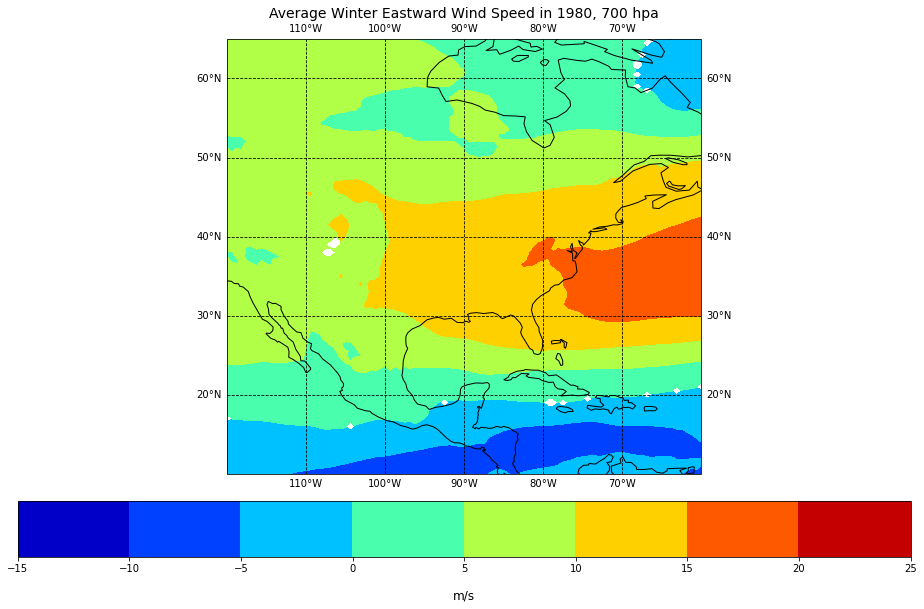

In [142]:
f = nc.Dataset('Data/Wind-Data/YearlyWindData/WindSpeed-1980.nc', 'r')
f2=nc.Dataset('20YearAvg-WindSpeed-10deg_1980-1999.nc','r')
f3=nc.Dataset('30yearWindSpeed-10deg.nc','r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,0,:,:]     ## 700 hpa 
climwind20=f2.variables['U'][0,:]
climwind30=f3.variables['U'][0,:]

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-120,-60,10,65],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#levels=np.linspace(-8,20,10)
plt.contourf(lons, lats, wind,transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Eastward Wind Speed in 1980, 700 hpa', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

# Jet shift #

### Neutral Years ###

In [37]:
file = 'NeutralYears-WindSpeed-10deg_1980-1999.nc'
f = nc.Dataset(file, 'r')
print(f)
print(np.nanmax(f['U'][0,:,:]))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(161), x(576), level(2)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 lev(level), float64 U(level, y, x)
    groups: 
17.9375


In [126]:
file='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.198201.SUB.nc'
f=nc.Dataset(file,'r')
print(f['U'])
print(f['U'][0,0,:,:])
print(np.nanmax(f['U'][0,0,:,:]))

<class 'netCDF4._netCDF4.Variable'>
float32 U(time, lev, lat, lon)
    long_name: eastward_wind
    units: m s-1
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
unlimited dimensions: time
current shape = (1, 2, 161, 576)
filling off
[[-2.3335440158843994 -2.1832776069641113 -2.0455942153930664 ...
  -2.8294222354888916 -2.6414999961853027 -2.4846343994140625]
 [-2.1609065532684326 -1.9936589002609253 -1.8140218257904053 ...
  -2.7292919158935547 -2.5135419368743896 -2.3253707885742188]
 [-2.065039873123169 -1.856240153312683 -1.6373341083526611 ...
  -2.705364942550659 -2.4883081912994385 -2.2714486122131348]
 ...
 [3.319101572036743 3.4015822410583496 3.4841291904449463 ...
  3.072932481765747 3.1546976566314697 3.2369601726531982]
 [2.9154436588287354 2.9929983615875244 3.0705795288085938 ...
  2.683492422103882 2.7606799602508545 2.8381197452545166]
 [3.32667398

In [2]:
for i in range(1980,2021):
    file = 'Data/Wind-Data/YearlyWindData/WindSpeed-{}.nc'.format(i)
    f = nc.Dataset(file, 'r')
    print(i, np.nanmax(f['U'][0,0,:,32:388]))

1980 18.5
1981 17.5625
1982 17.9375
1983 19.8125
1984 17.375
1985 18.0
1986 18.6875
1987 17.75
1988 17.875
1989 19.8125
1990 21.5
1991 19.1875
1992 16.6875
1993 16.875
1994 20.25
1995 18.4375
1996 16.3125
1997 16.375
1998 18.6875
1999 18.375
2000 17.5
2001 18.0625
2002 17.0625
2003 19.875
2004 17.0625
2005 16.0
2006 16.6875
2007 18.5
2008 18.6875
2009 17.75
2010 18.0625
2011 16.375
2012 16.9375
2013 17.125
2014 21.625
2015 18.6875
2016 18.1875
2017 16.375
2018 18.3125
2019 19.25
2020 18.875


In [312]:
file = 'NeutralYears-WindSpeed-10deg_1980-1999.nc'
f = nc.Dataset(file, 'r')
#print(f)
lat_list=[]
lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    #print(result)
    mid = np.median(result[0])
    if mid%2 != 0:
        mid = np.floor(mid)
    #print(mid)
#    boolarr2 =(result[0]==mid)
#    result2=np.where(boolarr2)
#    mid_index = np.median(result2)
#    if mid_index%2 != 0:
#        mid_index = np.floor(mid_index)
#    if mid_index >= 0:
#        mid_index=int(mid_index)
#    else:
#        mid_index=0
    

    lat_coord = f.variables['lat'][result[0]]
    lat_coord=lat_coord.compressed()
    lat_coord = lat_coord[0]
    
#    lat_coord = f.variables['lat'][result[0][mid_index]]
    lat_list.append(lat_coord)
    #latlist=[]
    #lonlist=[]
#    latlist.append(result[0][mid_index])
#    lonlist.append(result[1][mid_index])
    #for elem in result[0]:
    #    latlist.append(elem)
    #for elem in result[1]:
    #    lonlist.append(elem+32)    
print(len(lat_list))
print(len(lon_list))
print(np.max(lat_list),np.min(lat_list))
#print(lat_list)
#for i in range(len(lat_list)-1):
#    print(lat_list[i]-lat_list[i+1])

576
576
66.5 24.5


In [282]:
for i in range(len(lon_list)-1):
    if (lat_list[i] - lat_list[i+1]) >= 2:
        lat_list[i+1] = lat_list[i+1]+((lat_list[i]-lat_list[i+1])/2)
        lat_list[i] = lat_list[i]-((lat_list[i]-lat_list[i+1])/2)  
    elif (lat_list[i] - lat_list[i+1]) <= -22:
        lat_list[i+1] = lat_list[i+1]-((lat_list[i+1]-lat_list[i])/2)
        lat_list[i] = lat_list[i]+((lat_list[i+1]-lat_list[i])/2)
#    elif (lat_list[i] - lat_list[i+1]) >= 8:
#        lat_list[i+1] = lat_list[i+1]+((lat_list[i]-lat_list[i+1])/2)
#        lat_list[i] = lat_list[i]-((lat_list[i]-lat_list[i+1])/2)  
#    elif (lat_list[i] - lat_list[i+1]) <= -8:
#        lat_list[i+1] = lat_list[i+1]-((lat_list[i+1]-lat_list[i])/2)
#        lat_list[i] = lat_list[i]+((lat_list[i+1]-lat_list[i])/2)
#    elif (lat_list[i] - lat_list[i+1]) >= 4:
#        lat_list[i+1] = lat_list[i+1]+((lat_list[i]-lat_list[i+1])/2)
#        lat_list[i] = lat_list[i]-((lat_list[i]-lat_list[i+1])/2)
#    elif (lat_list[i] - lat_list[i+1]) <= -4:
#        lat_list[i+1] = lat_list[i+1]-((lat_list[i+1]-lat_list[i])/2)
#        lat_list[i] = lat_list[i]+((lat_list[i+1]-lat_list[i])/2)
        
print(lat_list)



[37.0, 36.0, 36.0, 36.0, 36.0, 36.5, 36.5, 36.5, 36.5, 36.5, 36.5, 36.0, 36.0, 35.5, 35.0, 35.5, 35.0, 35.5, 35.0, 35.0, 35.0, 35.5, 35.0, 35.5, 35.0, 35.0, 35.0, 35.0, 35.0, 35.5, 36.0, 35.5, 35.5, 36.0, 35.5, 36.0, 36.0, 35.5, 35.5, 35.5, 36.0, 35.5, 36.0, 35.5, 36.0, 36.0, 36.0, 36.5, 36.5, 38.5, 38.0, 40.0, 40.0, 40.0, 40.5, 40.5, 40.0, 40.0, 41.0, 40.5, 41.0, 42.0, 42.0, 42.0, 42.0, 42.5, 43.0, 44.0, 43.5, 44.0, 43.5, 44.5, 44.0, 44.0, 44.0, 44.0, 44.5, 44.5, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.5, 45.0, 45.5, 53.0, 53.0, 53.0, 50.875, 48.6875, 46.84375, 46.0625, 46.5, 47.5, 54.0, 54.0, 54.0, 53.5, 53.0, 51.25, 49.375, 48.75, 47.0, 49.5, 48.0, 47.5, 47.5, 47.0, 46.5, 47.0, 45.5, 45.5, 47.5, 48.0, 47.0, 45.25, 43.375, 42.75, 41.5, 46.0, 46.0, 46.0, 45.5, 45.5, 45.75, 45.0, 43.5, 43.5, 43.5, 41.0, 38.25, 37.5, 36.5, 36.5, 36.5, 36.5, 36.5, 36.5, 37.5, 36.5, 37.0, 37.0, 37.0, 36.5, 36.5, 36.5, 36.5, 37.0, 38.0, 37.5, 38.5, 38.5, 38.5, 38.5, 39.0, 38.5, 37.5, 38.5, 39.0, 39.0, 40.5,

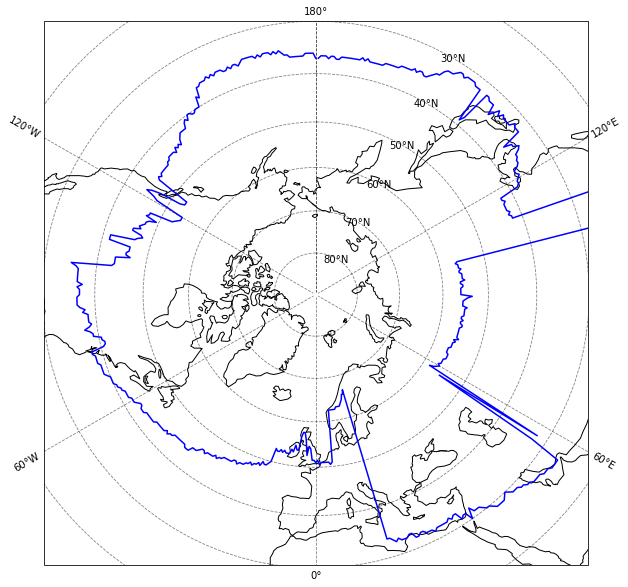

In [313]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())

plt.plot(lon_list, lat_list, color='blue', transform=ccrs.PlateCarree())

In [314]:
file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
f = nc.Dataset(file, 'r')
#print(f)
nino_lat_list=[]
nino_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
nino_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
#    mid = np.median(result[0])
#    if mid%2 != 0:
#        mid = np.floor(mid)
#    #print(mid)
#    boolarr2 =(result[0]==mid)
#    result2=np.where(boolarr2)
#    mid_index = np.median(result2)
#    if mid_index%2 != 0:
#        mid_index = np.floor(mid_index)
#    mid_index=int(mid_index)
    

    nino_lat_coord = f.variables['lat'][result[0]]
    nino_lat_coord=nino_lat_coord.compressed()
    nino_lat_coord = nino_lat_coord[0]
    
   # lat_coord = f.variables['lat'][result[0][mid_index]]
    #lat_coord=lat_coord.compressed()
    #lat_coord = lat_coord[0]
    nino_lat_list.append(nino_lat_coord)
    #latlist=[]
    #lonlist=[]
    #latlist.append(result[0][mid_index])
    #lonlist.append(result[1][mid_index])
    #for elem in result[0]:
    #    latlist.append(elem)
    #for elem in result[1]:
    #    lonlist.append(elem+32)    
print(len(nino_lat_list))
print(len(nino_lon_list))

576
576


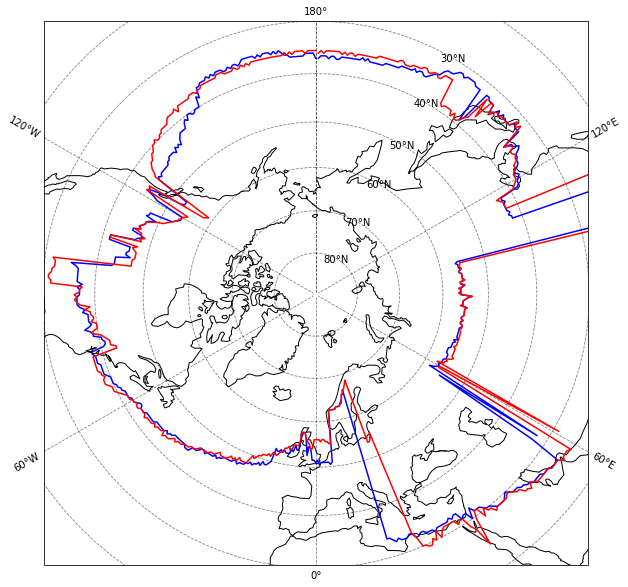

In [315]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())

plt.plot(lon_list, lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(nino_lon_list, nino_lat_list, color='red', transform=ccrs.PlateCarree())

In [316]:
file = 'LowSIC-WindSpeed-10deg_1980-1999.nc'
f = nc.Dataset(file, 'r')
#print(f)
lowsic_lat_list=[]
lowsic_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
#    mid = np.median(result[0])
#    if mid%2 != 0:
#        mid = np.floor(mid)
#    #print(mid)
#    boolarr2 =(result[0]==mid)
#    result2=np.where(boolarr2)
#    mid_index = np.median(result2)
#    if mid_index%2 != 0:
#        mid_index = np.floor(mid_index)
#    mid_index=int(mid_index)
    

    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]
    
   # lat_coord = f.variables['lat'][result[0][mid_index]]
    #lat_coord=lat_coord.compressed()
    #lat_coord = lat_coord[0]
    lowsic_lat_list.append(lowsic_lat_coord)
    #latlist=[]
    #lonlist=[]
    #latlist.append(result[0][mid_index])
    #lonlist.append(result[1][mid_index])
    #for elem in result[0]:
    #    latlist.append(elem)
    #for elem in result[1]:
    #    lonlist.append(elem+32)    
print(len(lowsic_lat_list))
print(len(lowsic_lon_list))

576
576


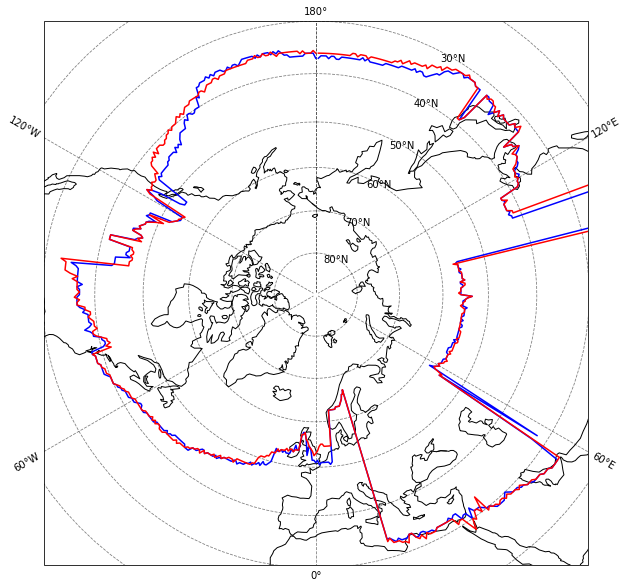

In [317]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())

plt.plot(lon_list, lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(lowsic_lon_list, lowsic_lat_list, color='red', transform=ccrs.PlateCarree())

In [318]:
file = 'ElNinoLowSIC-WindSpeed-10deg_1980-1999.nc'
f = nc.Dataset(file, 'r')
#print(f)
elninolowsic_lat_list=[]
elninolowsic_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
elninolowsic_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    ##have to add on shift from subsetted indices (ie +81 from above)
    
#    mid = np.median(result[0])
#    if mid%2 != 0:
#        mid = np.floor(mid)
#    #print(mid)
#    boolarr2 =(result[0]==mid)
#    result2=np.where(boolarr2)
#    mid_index = np.median(result2)
#    if mid_index%2 != 0:
#        mid_index = np.floor(mid_index)
#    mid_index=int(mid_index)
    

    elninolowsic_lat_coord = f.variables['lat'][result[0]]
    elninolowsic_lat_coord=elninolowsic_lat_coord.compressed()
    elninolowsic_lat_coord = elninolowsic_lat_coord[0]
    
   # lat_coord = f.variables['lat'][result[0][mid_index]]
    #lat_coord=lat_coord.compressed()
    #lat_coord = lat_coord[0]
    elninolowsic_lat_list.append(elninolowsic_lat_coord)
    #latlist=[]
    #lonlist=[]
    #latlist.append(result[0][mid_index])
    #lonlist.append(result[1][mid_index])
    #for elem in result[0]:
    #    latlist.append(elem)
    #for elem in result[1]:
    #    lonlist.append(elem+32)    
print(len(elninolowsic_lat_list))
print(len(elninolowsic_lon_list))

576
576


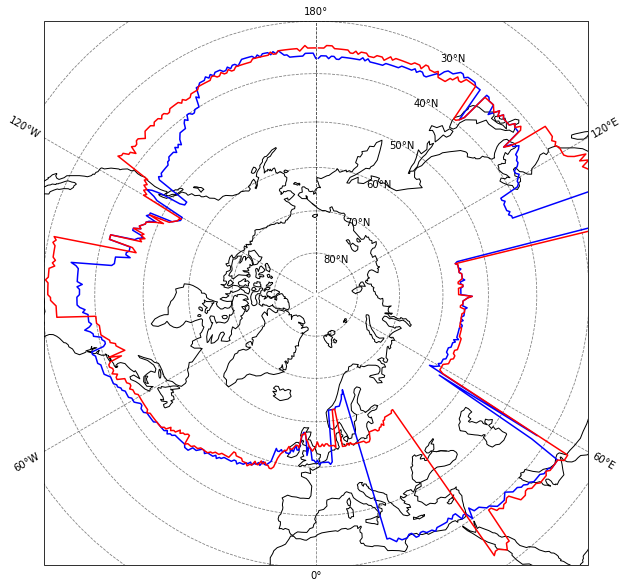

In [319]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())

plt.plot(lon_list, lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(elninolowsic_lon_list, elninolowsic_lat_list, color='red', transform=ccrs.PlateCarree())

# Jet shift, 1980-1999 

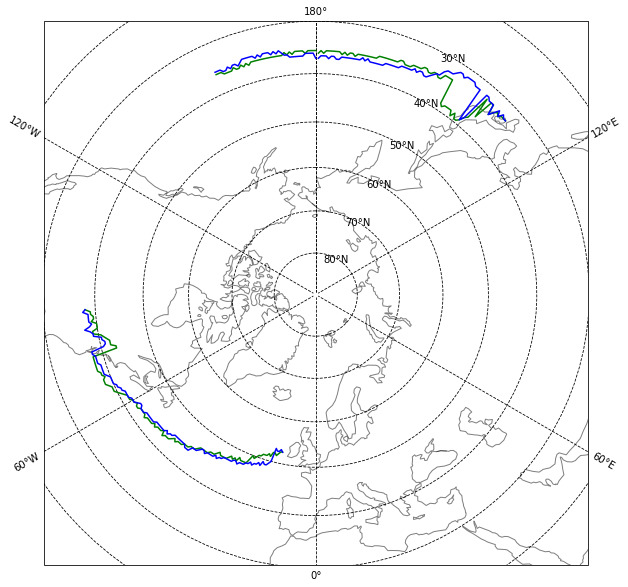

In [371]:
f = nc.Dataset('ElNino-WindSpeed-10deg_1980-1999.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
nino_lat_list=[]
nino_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
nino_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    nino_lat_coord = f.variables['lat'][result[0]]
    nino_lat_coord=nino_lat_coord.compressed()
    nino_lat_coord = nino_lat_coord[0]

    nino_lat_list.append(nino_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg_1980-1999.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_nino_lat_list = nino_lat_list[150:270]
na_nino_lon_list = nino_lon_list[150:270]
np_nino_lat_list=nino_lat_list[500:576]
np_nino_lon_list=nino_lon_list[500:576]
np2_nino_lat_list=nino_lat_list[0:40]
np2_nino_lon_list=nino_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[500:576]
np_neut_lon_list=neut_lon_list[500:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_nino_lon_list, na_nino_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_nino_lon_list, np_nino_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_nino_lon_list, np2_nino_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

In [338]:
file = 'Data/Wind-Data/YearlyWindData/WindSpeed-1980.nc'
f = nc.Dataset(file, 'r')
lon_index=[]

boolarr=((f.variables['lon'][:]>= -150) & (f.variables['lon'][:]<= 150))
print(np.where(boolarr))
print(f.variables['lon'][48:528])
#print(f['U'][0,0,48,186])

(array([ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 2

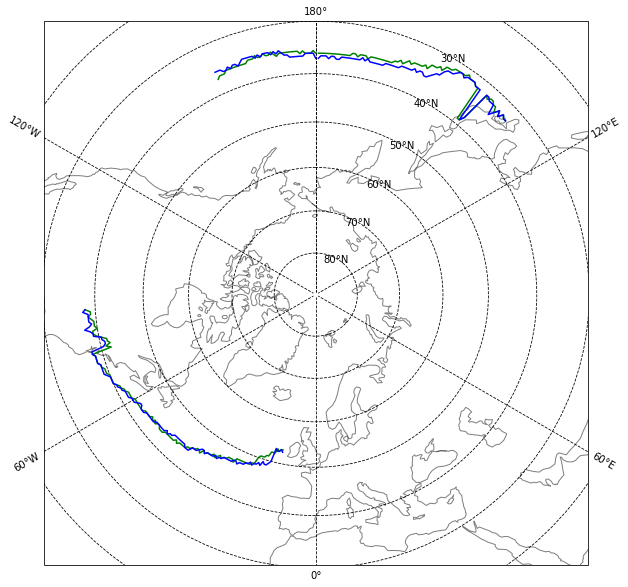

In [373]:
f = nc.Dataset('LowSIC-WindSpeed-10deg_1980-1999.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
lowsic_lat_list=[]
lowsic_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg_1980-1999.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[500:576]
np_lowsic_lon_list=lowsic_lon_list[500:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[500:576]
np_neut_lon_list=neut_lon_list[500:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

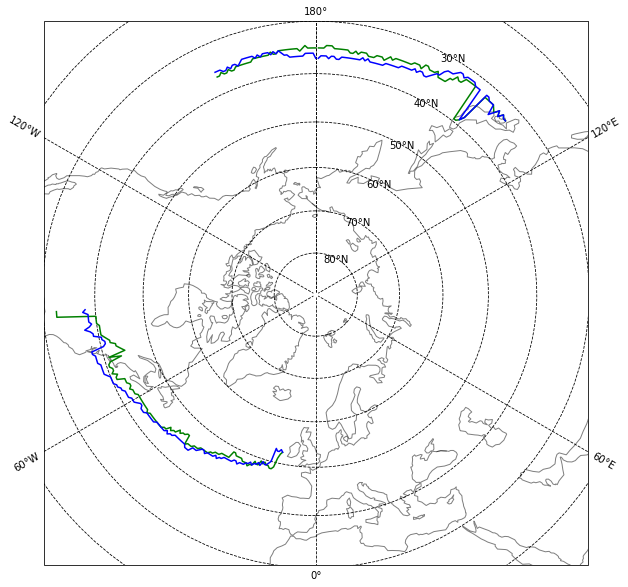

In [375]:
f = nc.Dataset('ElNinoLowSIC-WindSpeed-10deg_1980-1999.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
both_lat_list=[]
both_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
both_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    both_lat_coord = f.variables['lat'][result[0]]
    both_lat_coord=both_lat_coord.compressed()
    both_lat_coord = both_lat_coord[0]

    both_lat_list.append(both_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg_1980-1999.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_both_lat_list = both_lat_list[150:270]
na_both_lon_list = both_lon_list[150:270]
np_both_lat_list=both_lat_list[500:576]
np_both_lon_list=both_lon_list[500:576]
np2_both_lat_list=both_lat_list[0:40]
np2_both_lon_list=both_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[500:576]
np_neut_lon_list=neut_lon_list[500:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_both_lon_list, na_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_both_lon_list, np_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_both_lon_list, np2_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

# Jet shift, 2000 - 2020

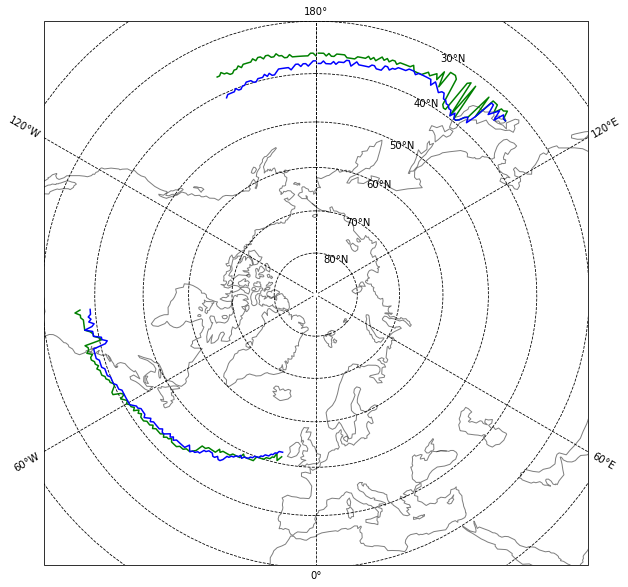

In [377]:
f = nc.Dataset('ElNinoYears-WindSpeed-10deg_2000-2020.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
nino_lat_list=[]
nino_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
nino_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    nino_lat_coord = f.variables['lat'][result[0]]
    nino_lat_coord=nino_lat_coord.compressed()
    nino_lat_coord = nino_lat_coord[0]

    nino_lat_list.append(nino_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg_2000-2020.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_nino_lat_list = nino_lat_list[150:270]
na_nino_lon_list = nino_lon_list[150:270]
np_nino_lat_list=nino_lat_list[500:576]
np_nino_lon_list=nino_lon_list[500:576]
np2_nino_lat_list=nino_lat_list[0:40]
np2_nino_lon_list=nino_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[500:576]
np_neut_lon_list=neut_lon_list[500:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_nino_lon_list, na_nino_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_nino_lon_list, np_nino_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_nino_lon_list, np2_nino_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

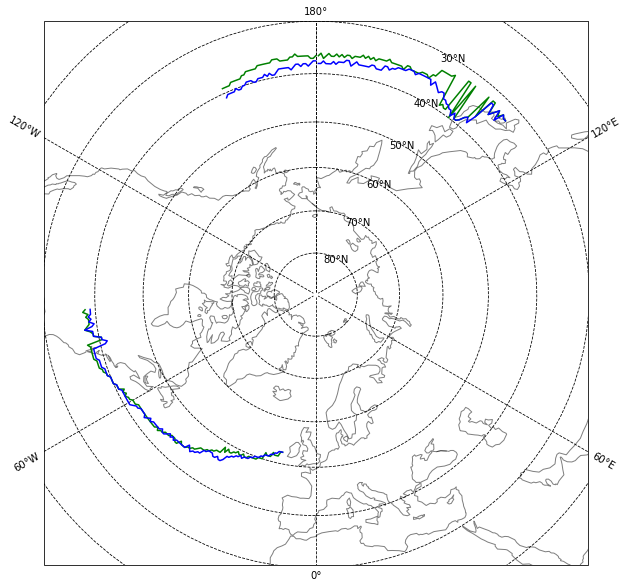

In [378]:
f = nc.Dataset('LowSICYears-WindSpeed-10deg_2000-2020.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
lowsic_lat_list=[]
lowsic_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
lowsic_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    lowsic_lat_coord = f.variables['lat'][result[0]]
    lowsic_lat_coord=lowsic_lat_coord.compressed()
    lowsic_lat_coord = lowsic_lat_coord[0]

    lowsic_lat_list.append(lowsic_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg_2000-2020.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_lowsic_lat_list = lowsic_lat_list[150:270]
na_lowsic_lon_list = lowsic_lon_list[150:270]
np_lowsic_lat_list=lowsic_lat_list[500:576]
np_lowsic_lon_list=lowsic_lon_list[500:576]
np2_lowsic_lat_list=lowsic_lat_list[0:40]
np2_lowsic_lon_list=lowsic_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[500:576]
np_neut_lon_list=neut_lon_list[500:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_lowsic_lon_list, na_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_lowsic_lon_list, np_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_lowsic_lon_list, np2_lowsic_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

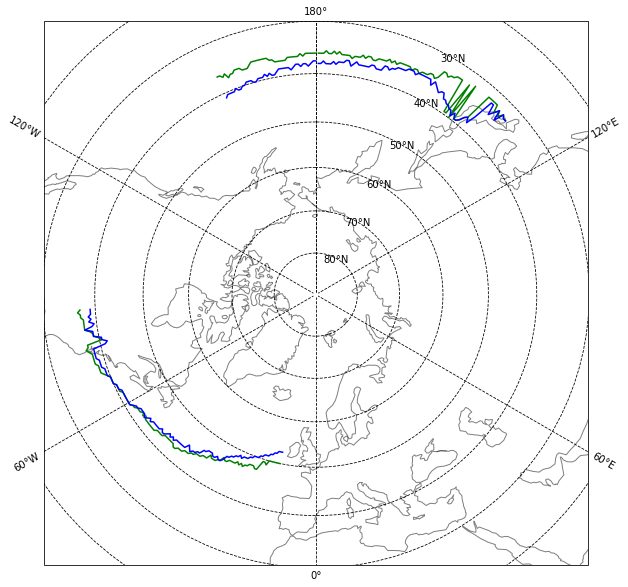

In [379]:
f = nc.Dataset('ElNinoLowSIC-WindSpeed-10deg_2000-2020.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
both_lat_list=[]
both_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
both_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    both_lat_coord = f.variables['lat'][result[0]]
    both_lat_coord=both_lat_coord.compressed()
    both_lat_coord = both_lat_coord[0]

    both_lat_list.append(both_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg_2000-2020.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_both_lat_list = both_lat_list[150:270]
na_both_lon_list = both_lon_list[150:270]
np_both_lat_list=both_lat_list[500:576]
np_both_lon_list=both_lon_list[500:576]
np2_both_lat_list=both_lat_list[0:40]
np2_both_lon_list=both_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[500:576]
np_neut_lon_list=neut_lon_list[500:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_both_lon_list, na_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_both_lon_list, np_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_both_lon_list, np2_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

# Updated plots based on std

## El Nino & Low SIC vs. Neutral #

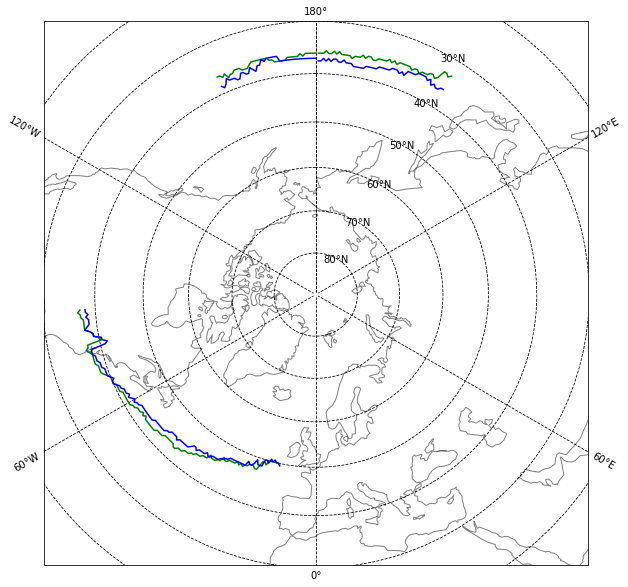

In [385]:
f = nc.Dataset('ElNinoLowSIC-WindSpeed-10deg_2000-2020.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
both_lat_list=[]
both_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
both_lon_list=lon[:]
wind=f.variables['U'][0,:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][0,:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    both_lat_coord = f.variables['lat'][result[0]]
    both_lat_coord=both_lat_coord.compressed()
    both_lat_coord = both_lat_coord[0]

    both_lat_list.append(both_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg-std.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_both_lat_list = both_lat_list[150:270]
na_both_lon_list = both_lon_list[150:270]
np_both_lat_list=both_lat_list[525:576]
np_both_lon_list=both_lon_list[525:576]
np2_both_lat_list=both_lat_list[0:40]
np2_both_lon_list=both_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_both_lon_list, na_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_both_lon_list, np_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_both_lon_list, np2_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

## El Nino & High SIC vs. Neutral #

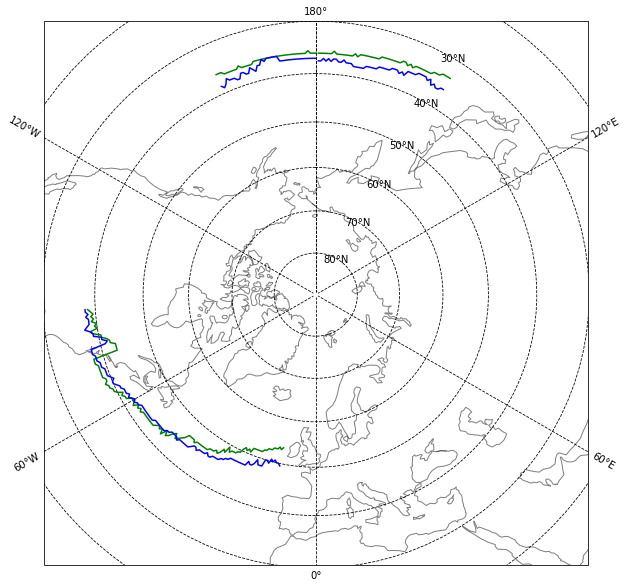

In [387]:
f = nc.Dataset('ElNinoHighSICYears-WindSpeed-10deg_std.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][0,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
both_lat_list=[]
both_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
both_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    both_lat_coord = f.variables['lat'][result[0]]
    both_lat_coord=both_lat_coord.compressed()
    both_lat_coord = both_lat_coord[0]

    both_lat_list.append(both_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg-std.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_both_lat_list = both_lat_list[150:270]
na_both_lon_list = both_lon_list[150:270]
np_both_lat_list=both_lat_list[525:576]
np_both_lon_list=both_lon_list[525:576]
np2_both_lat_list=both_lat_list[0:40]
np2_both_lon_list=both_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_both_lon_list, na_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_both_lon_list, np_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_both_lon_list, np2_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

## Low SIC vs. Neutral 

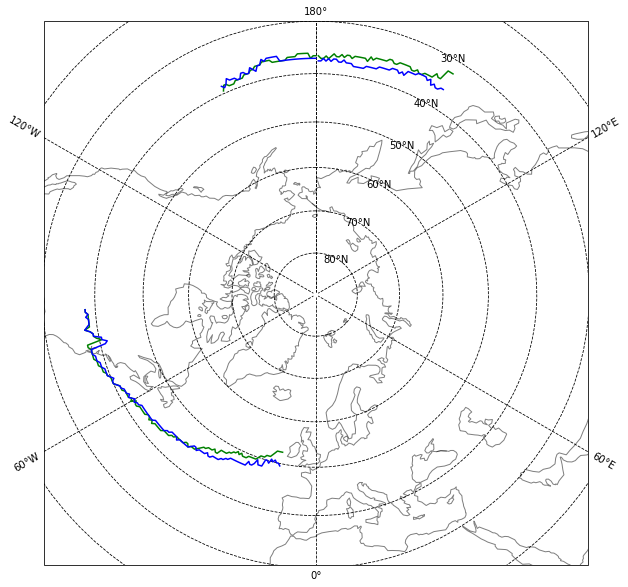

In [5]:
f = nc.Dataset('LowSICYears-WindSpeed-10deg_std.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][:,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
both_lat_list=[]
both_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
both_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    both_lat_coord = f.variables['lat'][result[0]]
    both_lat_coord=both_lat_coord.compressed()
    both_lat_coord = both_lat_coord[0]

    both_lat_list.append(both_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg-std.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_both_lat_list = both_lat_list[150:270]
na_both_lon_list = both_lon_list[150:270]
np_both_lat_list=both_lat_list[525:576]
np_both_lon_list=both_lon_list[525:576]
np2_both_lat_list=both_lat_list[0:40]
np2_both_lon_list=both_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_both_lon_list, na_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_both_lon_list, np_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_both_lon_list, np2_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())

## El Nino vs. Neutral 

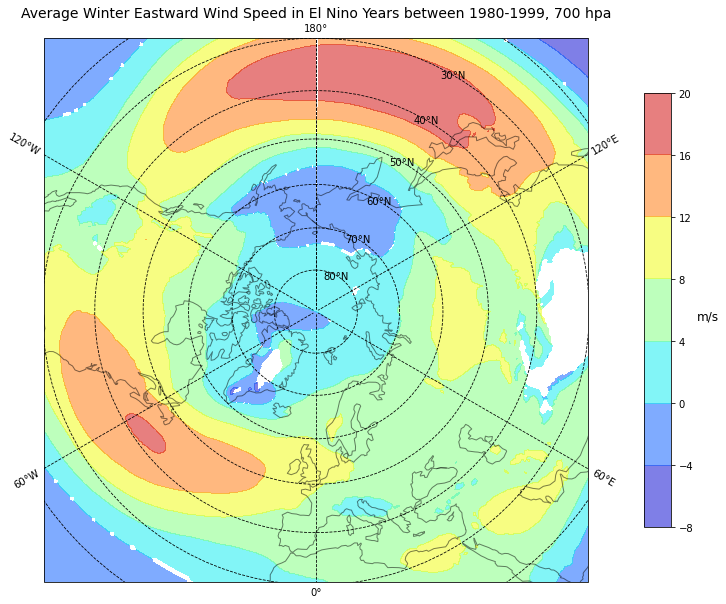

In [7]:
f = nc.Dataset('ElNinoYears-WindSpeed-10deg-std.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][:,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)

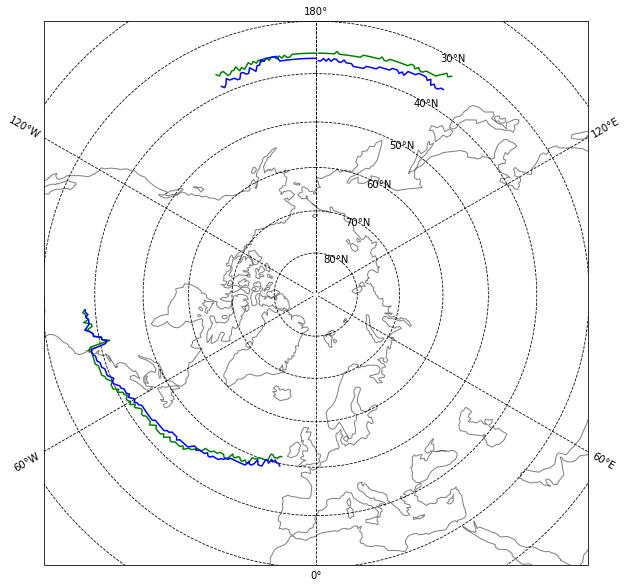

In [6]:
f = nc.Dataset('ElNinoYears-WindSpeed-10deg-std.nc', 'r')
lat= f.variables['lat']
lon=f.variables['lon']
wind=f.variables['U'][:,:]     ## 700 hpa 

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,30,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap=plt.cm.jet,alpha=0.5)
#plt.contour(lons, lats, wind,transform=ccrs.PlateCarree(),colors='black')
#plt.title('Average Winter Eastward Wind Speed in El Nino Years between 1980-1999, 700 hpa', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('m/s',size=12,rotation=0,labelpad=15)

#file = 'ElNino-WindSpeed-10deg_1980-1999.nc'
#f = nc.Dataset(file, 'r')
#print(f)
both_lat_list=[]
both_lon_list=[]
speed_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
both_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    
    both_lat_coord = f.variables['lat'][result[0]]
    both_lat_coord=both_lat_coord.compressed()
    both_lat_coord = both_lat_coord[0]

    both_lat_list.append(both_lat_coord)
f.close()

file = 'NeutralYears-WindSpeed-10deg-std.nc'
f = nc.Dataset(file, 'r')
#print(f)
neut_lat_list=[]
neut_lon_list=[]
lat= f.variables['lat'] ##161
lon=f.variables['lon'] ##32:288
neut_lon_list=lon[:]
wind=f.variables['U'][:,:]     ## 700 hpa 

for i in range(0,len(lon)):  ##len(lon)
    wind=f.variables['U'][:,i]
    #print(wind)
    wind_nonan=np.nan_to_num(wind)
    maxwind=np.nanmax(wind_nonan)
    #print(maxwind)
    speed_list.append(maxwind)
    boolarr=(wind_nonan==maxwind)
    result=np.where(boolarr) ##lat/long where wind speed is max
    neut_lat_coord = f.variables['lat'][result[0]]
    neut_lat_coord=neut_lat_coord.compressed()
    neut_lat_coord = neut_lat_coord[0]
    neut_lat_list.append(neut_lat_coord)


na_both_lat_list = both_lat_list[150:270]
na_both_lon_list = both_lon_list[150:270]
np_both_lat_list=both_lat_list[525:576]
np_both_lon_list=both_lon_list[525:576]
np2_both_lat_list=both_lat_list[0:40]
np2_both_lon_list=both_lon_list[0:40]

na_neut_lat_list=neut_lat_list[150:270]
na_neut_lon_list=neut_lon_list[150:270]
np_neut_lat_list=neut_lat_list[525:576]
np_neut_lon_list=neut_lon_list[525:576]
np2_neut_lat_list=neut_lat_list[0:40]
np2_neut_lon_list=neut_lon_list[0:40]

plt.plot(na_both_lon_list, na_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np_both_lon_list, np_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(np2_both_lon_list, np2_both_lat_list, color='green', transform=ccrs.PlateCarree())
plt.plot(na_neut_lon_list, na_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np_neut_lon_list, np_neut_lat_list, color='blue', transform=ccrs.PlateCarree())
plt.plot(np2_neut_lon_list, np2_neut_lat_list, color='blue', transform=ccrs.PlateCarree())